In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
df = pd.read_csv('/content/Price.csv')
df

,State,District,Market,Commodity,Variety,Grade,Arrival_Date,Min Price,Max Price,Modal Price
0,Gujarat,Amreli,Damnagar,Bhindi(Ladies Finger),Bhindi,FAQ,27-07-2023,4100.0,4500.0,4350.0
1,Gujarat,Amreli,Damnagar,Brinjal,Other,FAQ,27-07-2023,2200.0,3000.0,2450.0
2,Gujarat,Amreli,Damnagar,Cabbage,Cabbage,FAQ,27-07-2023,2350.0,3000.0,2700.0
3,Gujarat,Amreli,Damnagar,Cauliflower,Cauliflower,FAQ,27-07-2023,7000.0,7500.0,7250.0
4,Gujarat,Amreli,Damnagar,Coriander(Leaves),Coriander,FAQ,27-07-2023,8400.0,9000.0,8850.0
...,...,...,...,...,...,...,...,...,...,...
23088,Uttrakhand,Haridwar,Roorkee,Mango,Other,Medium,02-08-2023,800.0,1200.0,1000.0
23089,Uttrakhand,Haridwar,Roorkee,Mousambi(Sweet Lime),Other,Medium,02-08-2023,1500.0,2500.0,2000.0
23090,Uttrakhand,Haridwar,Roorkee,Pear(Marasebu),Other,Medium,02-08-2023,2000.0,3000.0,2500.0
23091,Uttrakhand,Haridwar,Roorkee,Potato,Other,FAQ,02-08-2023,900.0,1800.0,1500.0


# Data Preprocessing

In [3]:
# Convert Arrival_Date to datetime format
df['Arrival_Date'] = pd.to_datetime(df['Arrival_Date'], format='%d-%m-%Y')
# Extract features from the date
df['Day'] = df['Arrival_Date'].dt.day
df['Month'] = df['Arrival_Date'].dt.month
df['Year'] = df['Arrival_Date'].dt.year

In [4]:
# Apply LabelEncoder on all categorical columns for the entire dataset
label_encoder_dict = {}  # Dictionary to store the label encoders for each column

# Fit on the entire dataset
for col in ['State', 'District', 'Market', 'Commodity', 'Variety', 'Grade']:
    label_encoder = LabelEncoder()
    df[col] = label_encoder.fit_transform(df[col])
    label_encoder_dict[col] = label_encoder  # Store the encoder

In [5]:
# Define features (X) and target (y)
X = df[['State', 'District', 'Market', 'Commodity', 'Variety', 'Grade', 'Day', 'Month', 'Year']]
y = df[['Min Price', 'Max Price', 'Modal Price']]

In [6]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training

In [7]:
# Train a Random Forest model using MultiOutputRegressor
model = MultiOutputRegressor(RandomForestRegressor(n_estimators=100, random_state=42))
model.fit(X_train, y_train)

MultiOutputRegressor(estimator=RandomForestRegressor(random_state=42))

# Model Evaluation

In [8]:
# Make predictions and evaluate the model
y_pred = model.predict(X_test)

# Evaluation metrics
mae_min = mean_absolute_error(y_test['Min Price'], y_pred[:, 0])
mae_max = mean_absolute_error(y_test['Max Price'], y_pred[:, 1])
mae_modal = mean_absolute_error(y_test['Modal Price'], y_pred[:, 2])

mse_min = mean_squared_error(y_test['Min Price'], y_pred[:, 0])
mse_max = mean_squared_error(y_test['Max Price'], y_pred[:, 1])
mse_modal = mean_squared_error(y_test['Modal Price'], y_pred[:, 2])

r2_min = r2_score(y_test['Min Price'], y_pred[:, 0])
r2_max = r2_score(y_test['Max Price'], y_pred[:, 1])
r2_modal = r2_score(y_test['Modal Price'], y_pred[:, 2])

In [9]:
print(f"Mean Absolute Error (Min Price): {mae_min}")
print(f"Mean Absolute Error (Max Price): {mae_max}")
print(f"Mean Absolute Error (Modal Price): {mae_modal}")
print(f"Mean Squared Error (Min Price): {mse_min}")
print(f"Mean Squared Error (Max Price): {mse_max}")
print(f"Mean Squared Error (Modal Price): {mse_modal}")
print(f"R-squared (Min Price): {r2_min}")
print(f"R-squared (Max Price): {r2_max}")
print(f"R-squared (Modal Price): {r2_modal}")

Mean Absolute Error (Min Price): 801.3119162805801
Mean Absolute Error (Max Price): 892.3107027928123
Mean Absolute Error (Modal Price): 811.7955853431479
Mean Squared Error (Min Price): 5331171.476770241
Mean Squared Error (Max Price): 6720747.82728007
Mean Squared Error (Modal Price): 5858717.424979533
R-squared (Min Price): 0.8005927049180366
R-squared (Max Price): 0.8071964365607205
R-squared (Modal Price): 0.8103829201502213


# Visualisations

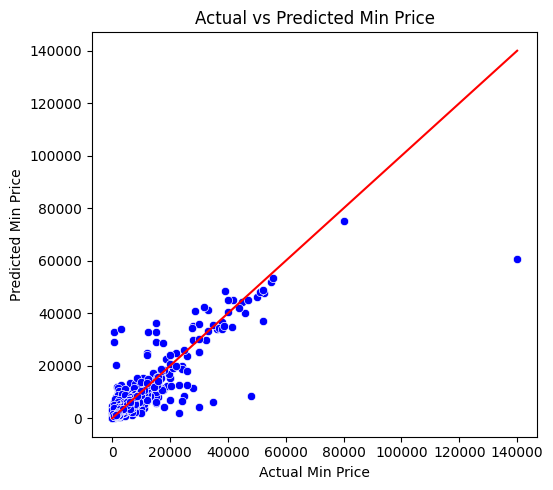

In [10]:
# Distribution of Actual vs Predicted Prices
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.scatterplot(x=y_test['Min Price'], y=y_pred[:, 0], color='b')
plt.plot([min(y_test['Min Price']), max(y_test['Min Price'])], [min(y_test['Min Price']), max(y_test['Min Price'])], color='r')
plt.title('Actual vs Predicted Min Price')
plt.xlabel('Actual Min Price')
plt.ylabel('Predicted Min Price')

plt.tight_layout()
plt.show()

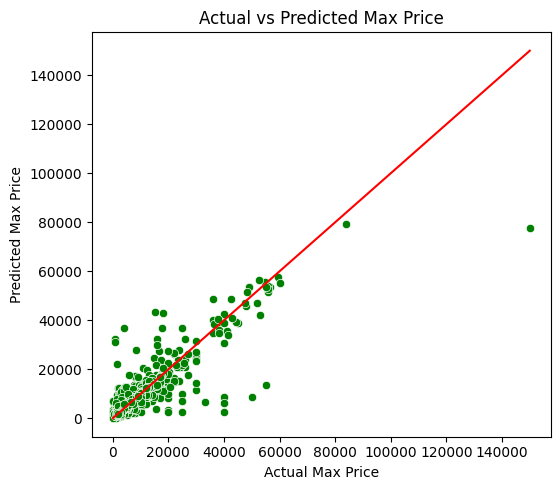

In [11]:
plt.figure(figsize=(16, 5))
plt.subplot(1, 3, 2)
sns.scatterplot(x=y_test['Max Price'], y=y_pred[:, 1], color='g')
plt.plot([min(y_test['Max Price']), max(y_test['Max Price'])], [min(y_test['Max Price']), max(y_test['Max Price'])], color='r')
plt.title('Actual vs Predicted Max Price')
plt.xlabel('Actual Max Price')
plt.ylabel('Predicted Max Price')

plt.tight_layout()
plt.show()

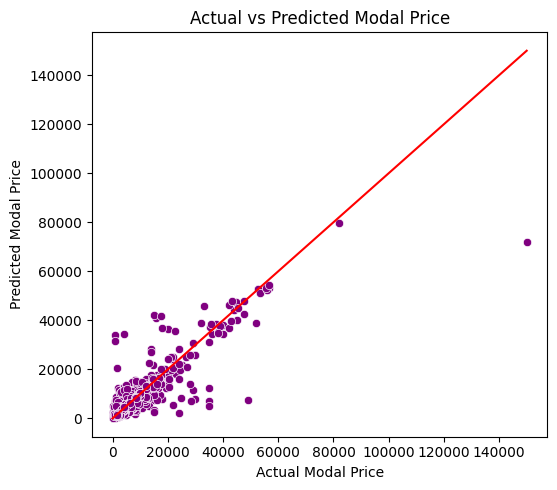

In [12]:
plt.figure(figsize=(16, 5))
plt.subplot(1, 3, 3)
sns.scatterplot(x=y_test['Modal Price'], y=y_pred[:, 2], color='purple')
plt.plot([min(y_test['Modal Price']), max(y_test['Modal Price'])], [min(y_test['Modal Price']), max(y_test['Modal Price'])], color='r')
plt.title('Actual vs Predicted Modal Price')
plt.xlabel('Actual Modal Price')
plt.ylabel('Predicted Modal Price')

plt.tight_layout()
plt.show()

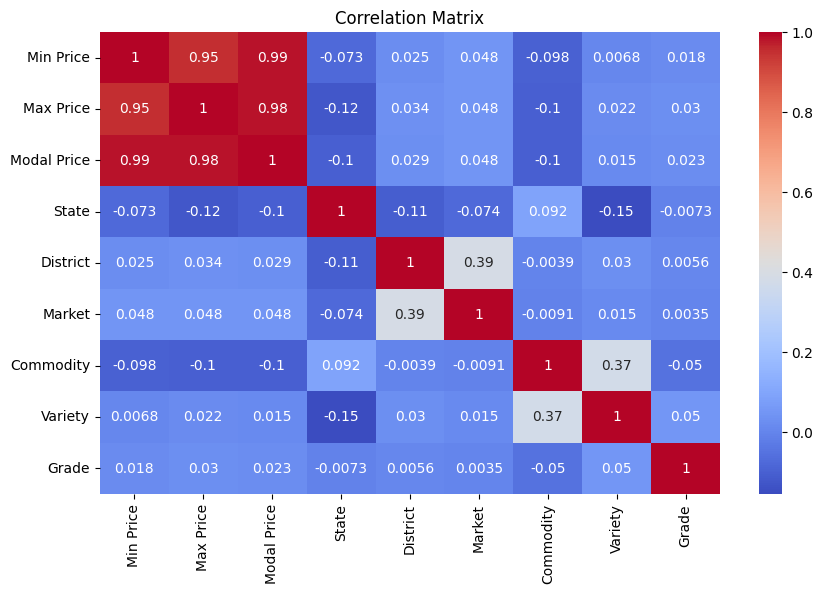

In [13]:
# Correlation Heatmap
plt.figure(figsize=(10, 6))
corr_matrix = df[['Min Price', 'Max Price', 'Modal Price', 'State', 'District', 'Market', 'Commodity', 'Variety', 'Grade']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Testing on custom Input

In [16]:
# Define a helper function to handle label encoding
def encode_future_data(label_encoder, value):
    if value in label_encoder.classes_:
        return label_encoder.transform([value])[0]
    else:
        print(f"Warning: '{value}' is not in the training data.")
        return -1  # Handle unseen categories

# Function to take user input
def get_user_input():
    # Taking user input for each required field
    state = input("Enter State: ")
    district = input("Enter District: ")
    market = input("Enter Market: ")
    commodity = input("Enter Commodity: ")
    variety = input("Enter Variety: ")
    grade = input("Enter Grade: ")

    # Taking user input for date
    day = int(input("Enter Day (1-31): "))
    month = int(input("Enter Month (1-12): "))
    year = int(input("Enter Year: "))

    # Return the inputs in dictionary form
    return {
        'State': state,
        'District': district,
        'Market': market,
        'Commodity': commodity,
        'Variety': variety,
        'Grade': grade,
        'Day': day,
        'Month': month,
        'Year': year
    }

# Call the function to take input
user_input = get_user_input()

# Prepare the future_data DataFrame using the encoded user inputs
future_data = pd.DataFrame({
    'State': [encode_future_data(label_encoder_dict['State'], user_input['State'])],
    'District': [encode_future_data(label_encoder_dict['District'], user_input['District'])],
    'Market': [encode_future_data(label_encoder_dict['Market'], user_input['Market'])],
    'Commodity': [encode_future_data(label_encoder_dict['Commodity'], user_input['Commodity'])],
    'Variety': [encode_future_data(label_encoder_dict['Variety'], user_input['Variety'])],
    'Grade': [encode_future_data(label_encoder_dict['Grade'], user_input['Grade'])],
    'Day': [user_input['Day']],
    'Month': [user_input['Month']],
    'Year': [user_input['Year']]
})

# Display the future_data DataFrame for debugging
print(future_data)

# Predict future prices (Min, Max, Modal)
future_price = model.predict(future_data)
print(f'Predicted Future Min Price: {future_price[0][0]}')
print(f'Predicted Future Max Price: {future_price[0][1]}')
print(f'Predicted Future Modal Price: {future_price[0][2]}')


Enter State: Gujarat
Enter District: Amreli
Enter Market: Damnagar
Enter Commodity: Bhindi(Ladies Finger)
Enter Variety: Bhindi
Enter Grade: FAQ
Enter Day (1-31): 1
Enter Month (1-12): 11
Enter Year: 2024
   State  District  Market  Commodity  Variety  Grade  Day  Month  Year
0      6        12     309         22       57      0    1     11  2024
Predicted Future Min Price: 2983.5
Predicted Future Max Price: 4196.0
Predicted Future Modal Price: 3386.5
